In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [2]:
# data for authorizations from all hurricanes

auth_sandy = "./CleanEconData/Sandy_cln_housingauth.csv"
auth_sandy_df = pd.read_csv(auth_sandy)
auth_sandy_df = auth_sandy_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_rita = "./CleanEconData/rita_cln_housingauth.csv"
auth_rita_df = pd.read_csv(auth_rita)
auth_rita_df = auth_rita_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_katrina = "./CleanEconData/katrina_cln_housingauth.csv"
auth_katrina_df = pd.read_csv(auth_katrina)
auth_katrina_df = auth_katrina_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_ike = "./CleanEconData/Ike_cln_housingauth.csv"
auth_ike_df = pd.read_csv(auth_ike)
auth_ike_df = auth_ike_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_ivan = "./CleanEconData/Ivan_cln_housingauth.csv"
auth_ivan_df = pd.read_csv(auth_ivan)
auth_ivan_df = auth_ivan_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

print(auth_katrina_df)

                   Location Hurricane  \
0    New Orleans Metro Area   Katrina   
1    New Orleans Metro Area   Katrina   
2    New Orleans Metro Area   Katrina   
3    New Orleans Metro Area   Katrina   
4    New Orleans Metro Area   Katrina   
..                      ...       ...   
247  New Orleans Metro Area   Katrina   
248  New Orleans Metro Area   Katrina   
249  New Orleans Metro Area   Katrina   
250  New Orleans Metro Area   Katrina   
251  New Orleans Metro Area   Katrina   

     New Private Housing Structures Authorized  Delta  Housing Auth Month  
0                                        504.0     -4                   1  
1                                        246.0     -4                   2  
2                                        269.0     -4                   3  
3                                        279.0     -4                   4  
4                                        296.0     -4                   5  
..                                         ...    .

In [3]:
#merge on Delta with value between -4 and 10

auth_merge_df = pd.concat([auth_sandy_df,auth_katrina_df,auth_ike_df,auth_ivan_df,auth_rita_df ])

auth_merge_df = auth_merge_df[auth_merge_df['Delta'].between(-4,7)]

auth_merge_df.reset_index(level=0, inplace=True)


# auth_merge_df.head()
# print(auth_merge_df)
# print(auth_merge_df.columns.tolist())

In [4]:
auth_merge_df=auth_merge_df.pivot_table( values =['New Private Housing Structures Authorized'], index=['Delta', 'Housing Auth Month'], columns = ['Hurricane']).reset_index()
# auth_merge_df.dropna()

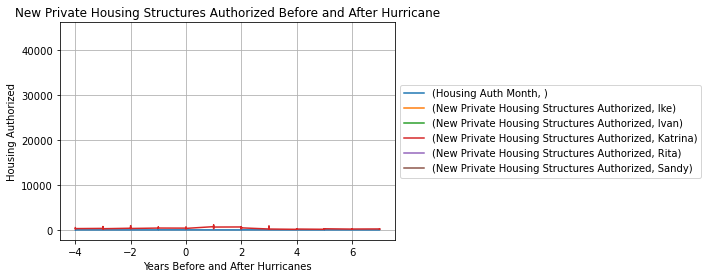

In [5]:
auth_merge_df.plot(x = 'Delta')
plt.title('New Private Housing Structures Authorized Before and After Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Housing Authorized')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.savefig('./Graphs/HousingAuthGraph.png')
